<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Обработка-категориальных-признаков" data-toc-modified-id="Обработка-категориальных-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка категориальных признаков</a></span></li><li><span><a href="#Разделение-на-обучающую,-валидационную-и-тестовую-выборки" data-toc-modified-id="Разделение-на-обучающую,-валидационную-и-тестовую-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение на обучающую, валидационную и тестовую выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Сравнение-с-другим-алгоритмом" data-toc-modified-id="Сравнение-с-другим-алгоритмом-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравнение с другим алгоритмом</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выврды-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Прогнозирование оттока клиентов банка

Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

`ТЗ:` Построить модель с предельно большим значением F1-меры. Также необходимо дополнительно измерять AUC-ROC, сравнивать её значение с F1-мерой.

## Подготовка данных

In [133]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
pd.plotting.register_matplotlib_converters()
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import f1_score, roc_auc_score, plot_roc_curve
from sklearn.utils import shuffle


In [3]:
path = 'Churn_Modelling.csv'
data = pd.read_csv(path)

In [4]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

Выведем общую информацию о датасете:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Предобработка данных

Удалим первый столбец с индексом строки в данных:

In [8]:
data.drop(columns='RowNumber', inplace = True)

Посмотрим на пропуски в данных:

In [9]:
data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Посмотрим, есть ли дубликаты в данных:

In [10]:
data.duplicated().sum()

0

### Обработка категориальных признаков

In [11]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
categorical_features = data.select_dtypes(include='object').columns
categorical_features

Index(['Surname', 'Geography', 'Gender'], dtype='object')

В датасете есть несколько категориальных признаков `(Geography, Gender, HasCrCard, IsActiveMember)`, однако последние два уже представлены в виде булевых переменных.

Для обучения моделей нам следует преобразовать столбец `Gender` в дамми-переменную (при этом откинув первый столбец, так как по оставшейся переменной можно однозначно восстановить пол):

In [13]:
data['Gender'] = pd.get_dummies(data = data['Gender'], drop_first=True)

In [14]:
data.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,False,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,False,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,False,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,False,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,False,43,2,125510.82,1,1,1,79084.10,0


Аналогично поступим со столбцом `Geography`:

In [15]:
g_col = pd.get_dummies(data=data['Geography'], drop_first=True)
data.drop(columns='Geography', inplace=True)
data = pd.concat([data, g_col], axis=1)


In [16]:
data.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,15634602,Hargrave,619,False,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,Hill,608,False,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,Onio,502,False,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,Boni,699,False,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,Mitchell,850,False,43,2,125510.82,1,1,1,79084.10,0,False,True


### Разделение на обучающую, валидационную и тестовую выборки

Разделим данные на обучающую, валидационную и тестовую выборку в соотношении 50/25/25:

In [98]:
features = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)
target = data['Exited']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.5, random_state=15)

In [115]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size=0.5, random_state=15)

Проверим размеры выборок:

In [116]:
print("Обучающая выборка:", X_train.shape)
print("Тестовая выборка:", X_test.shape)
print("Валидационная выборка:", X_valid.shape)

Обучающая выборка: (5000, 11)
Тестовая выборка: (2500, 11)
Валидационная выборка: (2500, 11)


### Масштабирование признаков

Масштабируем наши признаки:

In [55]:
numeric = features.select_dtypes(include=np.number).drop(['HasCrCard', 'IsActiveMember'], axis=1).columns
numeric

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

In [60]:
scaler = StandardScaler()
scaler.fit(X_train[numeric])

StandardScaler()

In [61]:
X_train.loc[:, numeric] = scaler.transform(X_train[numeric])
X_test.loc[:, numeric] = scaler.transform(X_test[numeric])

## Исследование задачи

Посмотрим, как распределены классы, т.е. значения в столбце `Exited`:

In [57]:
target.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='proportion'>

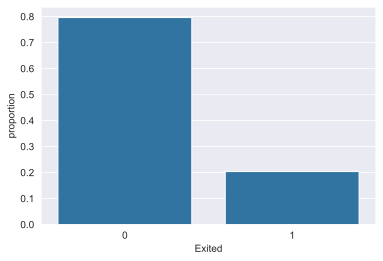

In [137]:
sns.barplot(data=target.value_counts(normalize=True))

Таким образом, **преобладает отрицательный класс**. Примерное соотношение классов - 80% на 20%

С помошью кросс-валидации подберём и обучим наилучшую модель случайного леса без учёта дисбаланса классов:

In [ ]:
best_model = None
max_score = -1
for depth in range(1,15):
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state=15)
        model.fit(X_train, y_train)
        score = f1_score(y_valid, model.predict(X_valid))
        if score > max_score:
            max_score = score
            best_model = model

Посмотрим на параметры наилучшей модели:

In [123]:
print("Наибольшая глубина дерева:", best_model.max_depth)
print("Количество деревьев:", best_model.n_estimators)
print(f"F1-score: {max_score:.4f}")

Наибольшая глубина дерева: 13
Количество деревьев: 65
F1-score: 0.5689


Посмотрим также на метрику AUC-ROC:

In [131]:
probabilities_valid = best_model.predict_proba(X_valid)

auc_roc = roc_auc_score(y_valid, probabilities_valid[:, 1])
print(f"AUC-ROC score: {auc_roc:.4f}")

AUC-ROC score: 0.8554


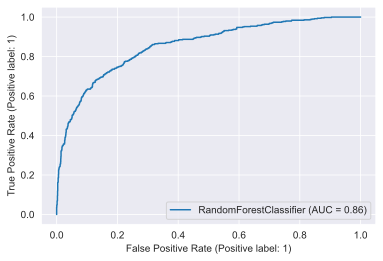

In [ ]:
plot_roc_curve(best_model, X_valid, y_valid)

AUC-ROC значительно выше AUC-ROC для случайной модели `(0.86 > 0.5)`, что говорит о том, что наша модель имеет место быть.

## Борьба с дисбалансом

Как мы заметили ранее, у нас присутствует дисбаланс классов. Следовательно, при `upsampling` потребуется увеличить размер примеров "положительного" класса приблизительно в 4 раза. При `downsampling` же, наоборот, потребуется уменьшить размер примеров отрицательного класса в 4 раза.

### Взвешивание классов

Попробуем повысить значение метрики F1 за счёт **взвешивания классов**. Для этого всё так же будем обучать модель случайного леса, но уже с параметром `class_weight='balanced'`

In [139]:
best_model = None
max_score = -1
for depth in range(1,15):
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state=15, class_weight='balanced')
        model.fit(X_train, y_train)
        score = f1_score(y_valid, model.predict(X_valid))
        if score > max_score:
            max_score = score
            best_model = model

Теперь посмотрим на параметры самой лучшей обученной модели:

In [142]:
print("Наибольшая глубина дерева:", best_model.max_depth)
print("Количество деревьев:", best_model.n_estimators)
print(f"F1-score: {max_score:.4f}")

Наибольшая глубина дерева: 8
Количество деревьев: 80
F1-score: 0.6359


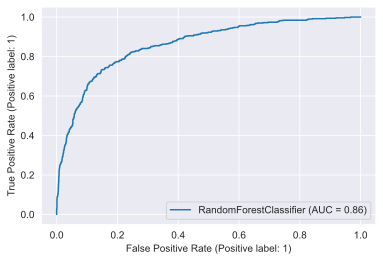

In [143]:
plot_roc_curve(best_model, X_valid, y_valid)

### Upsampling

Реализуем функцию для увеличения размера положительного класса:

In [144]:
def upsample(X, y, times):
    X_res = pd.concat([X[y==0]] + [X[y==1]] * times)
    y_res = pd.concat([y[y==0]] + [y[y==1]] * times)
    
    X_res, y_res = shuffle(X_res, y_res, random_state=15)
    
    return X_res, y_res

Преобразуем обучающую выборку

In [145]:
X_train_up, y_train_up = upsample(X_train, y_train, 4)

Подберём оптимальные параметры модели:

In [169]:
best_model = None
max_score = -1
for depth in range(1,15):
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state=15)
        model.fit(X_train_up, y_train_up)
        score = f1_score(y_valid, model.predict(X_valid))
        if score > max_score:
            max_score = score
            best_model = model

In [170]:
print("Наибольшая глубина дерева:", best_model.max_depth)
print("Количество деревьев:", best_model.n_estimators)
print(f"F1-score: {max_score:.4f}")

Наибольшая глубина дерева: 8
Количество деревьев: 95
F1-score: 0.6338


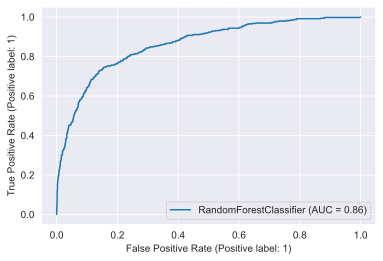

In [171]:
plot_roc_curve(best_model, X_valid, y_valid)

Вышло чуть-чуть хуже, чем при взвешивании классов

### Downsampling

Реализуем функцию для уменьшения размера отрицательного класса:

In [172]:
def downsample(X, y, times):
    X_majority = X[y == 0]
    y_majority = y[y == 0]
    X_minority = X[y == 1]
    y_minority = y[y == 1]

    n_samples = int(len(X_minority) * times)
    X_majority_downsampled = X_majority.sample(n=n_samples, random_state=15)
    y_majority_downsampled = y_majority.loc[X_majority_downsampled.index]

    X_res = pd.concat([X_majority_downsampled, X_minority])
    y_res = pd.concat([y_majority_downsampled, y_minority])
    X_res, y_res = shuffle(X_res, y_res, random_state=15)
    
    return X_res, y_res

Преобразуем обучающую выборку

In [173]:
X_train_down, y_train_down = downsample(X_train, y_train, 0.25)

Подберём оптимальные параметры модели:

In [177]:
best_model = None
max_score = -1
for depth in range(1,15):
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state=15)
        model.fit(X_train_down, y_train_down)
        score = f1_score(y_valid, model.predict(X_valid))
        if score > max_score:
            max_score = score
            best_model = model

In [178]:
print("Наибольшая глубина дерева:", best_model.max_depth)
print("Количество деревьев:", best_model.n_estimators)
print(f"F1-score: {max_score:.4f}")

Наибольшая глубина дерева: 13
Количество деревьев: 10
F1-score: 0.4276


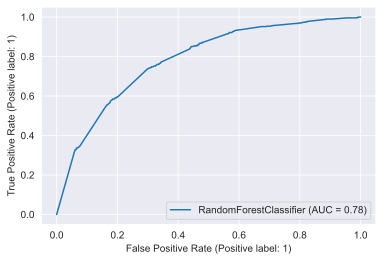

In [179]:
plot_roc_curve(best_model, X_valid, y_valid)

Качество такой модели ниже, чем при `upsampling` и при `взвешивании классов`.

### Сравнение с другим алгоритмом

Для сравнения обучим модель логистической регрессии с взвешиванием классов:

In [166]:
model_lr = LogisticRegression(solver='liblinear', class_weight='balanced')
model_lr.fit(X_train, y_train)

f1_val = f1_score(y_valid, model_lr.predict(X_valid))
print(f"F1-score: {f1_val:.4f}")

F1-score: 0.4738


Теперь посмотрим на AUC-ROC:

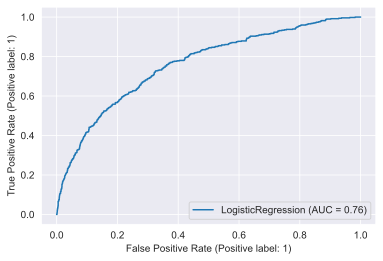

In [168]:
plot_roc_curve(model_lr, X_valid, y_valid)

Получилось значительно хуже, чем у случайного леса, поэтому такую модель можно отбросить.

## Тестирование модели

Наилучшей оказалась модель случайного леса с максимальной глубиной дерева, равной 8, и количеством деревьев, равным 80. При этом следует использовать `взвешивание классов`.

In [183]:
best_model_final = RandomForestClassifier(n_estimators = 80, max_depth = 8, random_state=15, class_weight='balanced')
best_model_final.fit(X_train, y_train)
f1_score_test = f1_score(y_test, best_model_final.predict(X_test))

print(f"F1-score на тестовой выборке: {f1_score_test:.4f}")

F1-score на тестовой выборке: 0.6279


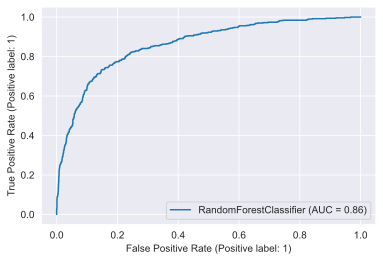

In [187]:
plot_roc_curve(best_model_final, X_valid, y_valid)

## Выводы

- Значение метрики F1 на тестовой выборке составило **62.8%**;
- Значение площади под ROC-кривой составило примерно 0.86, что говорит о том, что наша модель работает значительно лучше "случайной модели".

Таким образом, полученная модель показала высокую эффективность может использоваться для прогнозирования факта того, что клиент с определёнными признаками уйдёт